In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [ ]:
# Read in and clean data

In [ ]:
N: Column: Description

1: AGE: age in years
2: GENDER: gender (1 = male; 0 = female)
3: CP: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
4: TRESTBPS: resting blood pressure (in mm Hg on admission to the hospital)
5: CHOL: serum cholestoral in mg/dl
6: FBS: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7: RESTECG: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8: THALACH: maximum heart rate achieved
9: EXANG: exercise induced angina (1 = yes; 0 = no)
10: OLDPEAK = ST depression induced by exercise relative to rest
11: SLOPE: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
12: CA: number of major vessels (0-3) colored by flourosopy
13: THAL: 3 = normal; 6 = fixed defect; 7 = reversable defect
14: NUM: diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1,2,3,4: > 50% diameter narrowing
    presence (values 1,2,3,4) absence (value 0)

In [2]:
col_names = ["AGE", "GENDER", "CP", "TRESTBPS", "CHOL", "FBS", "RESTECG", "THALACH", "EXANG", "OLDPEAK", "SLOPE", "CA", "THAL", "NUM"]
col_types = {"AGE": np.float_, "GENDER": np.int_ , "CP": np.int_, "TRESTBPS": np.float_, "CHOL": np.float_,
             "FBS": np.int_, "RESTECG": np.int_, "THALACH": np.float_, "EXANG": np.int_, "OLDPEAK": np.float_,
             "SLOPE": np.int_, "CA": np.int_, "THAL": np.int_, "NUM": np.int_}
health_data = pd.read_csv("Data/processed.cleveland.data", names = col_names)
print(health_data.values)

[[63.0 1.0 1.0 ..., '0.0' '6.0' 0]
 [67.0 1.0 4.0 ..., '3.0' '3.0' 2]
 [67.0 1.0 4.0 ..., '2.0' '7.0' 1]
 ..., 
 [57.0 1.0 4.0 ..., '1.0' '7.0' 3]
 [57.0 0.0 2.0 ..., '1.0' '3.0' 1]
 [38.0 1.0 3.0 ..., '?' '3.0' 0]]


In [3]:
for name in col_names:
    data_type = col_types[name]
    print(name+":", health_data[name].dtype)
    

AGE: float64
GENDER: float64
CP: float64
TRESTBPS: float64
CHOL: float64
FBS: float64
RESTECG: float64
THALACH: float64
EXANG: float64
OLDPEAK: float64
SLOPE: float64
CA: object
THAL: object
NUM: int64


In [4]:
print("CA")
print(health_data.CA.value_counts())
print("THAL")
print(health_data.THAL.value_counts())

CA
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: CA, dtype: int64
THAL
3.0    166
7.0    117
6.0     18
?        2
Name: THAL, dtype: int64


In [5]:
health_data.loc[health_data.CA == "?", "CA"] = "-1"

In [6]:
health_data.loc[health_data.THAL == "?", "THAL"] = "-1"

In [7]:
print("CA")
print(health_data.CA.value_counts())
print("THAL")
print(health_data.THAL.value_counts())

CA
0.0    176
1.0     65
2.0     38
3.0     20
-1       4
Name: CA, dtype: int64
THAL
3.0    166
7.0    117
6.0     18
-1       2
Name: THAL, dtype: int64


In [8]:
health_data.values

array([[63.0, 1.0, 1.0, ..., '0.0', '6.0', 0],
       [67.0, 1.0, 4.0, ..., '3.0', '3.0', 2],
       [67.0, 1.0, 4.0, ..., '2.0', '7.0', 1],
       ..., 
       [57.0, 1.0, 4.0, ..., '1.0', '7.0', 3],
       [57.0, 0.0, 2.0, ..., '1.0', '3.0', 1],
       [38.0, 1.0, 3.0, ..., '-1', '3.0', 0]], dtype=object)

In [9]:
for name in col_names:
    data_type = col_types[name]
    print(name+":", health_data[name].dtype)

AGE: float64
GENDER: float64
CP: float64
TRESTBPS: float64
CHOL: float64
FBS: float64
RESTECG: float64
THALACH: float64
EXANG: float64
OLDPEAK: float64
SLOPE: float64
CA: object
THAL: object
NUM: int64


In [10]:
health_data.CA = health_data.CA.astype(np.float_)
health_data.THAL = health_data.THAL.astype(np.float_)
health_data = health_data.astype(col_types)
health_data.dtypes

AGE         float64
GENDER        int64
CP            int64
TRESTBPS    float64
CHOL        float64
FBS           int64
RESTECG       int64
THALACH     float64
EXANG         int64
OLDPEAK     float64
SLOPE         int64
CA            int64
THAL          int64
NUM           int64
dtype: object

In [11]:
health_data.values

array([[ 63.,   1.,   1., ...,   0.,   6.,   0.],
       [ 67.,   1.,   4., ...,   3.,   3.,   2.],
       [ 67.,   1.,   4., ...,   2.,   7.,   1.],
       ..., 
       [ 57.,   1.,   4., ...,   1.,   7.,   3.],
       [ 57.,   0.,   2., ...,   1.,   3.,   1.],
       [ 38.,   1.,   3., ...,  -1.,   3.,   0.]])

# Exploratory Data Analysis

For integer variables, create frequency tables.

For floating point variables, look at max, min, range, histogram, correlation plot 

In [12]:
for name in health_data.columns:
    if health_data[name].dtype == np.int_:
        print(health_data[name].value_counts())

1    206
0     97
Name: GENDER, dtype: int64
4    144
3     86
2     50
1     23
Name: CP, dtype: int64
0    258
1     45
Name: FBS, dtype: int64
0    151
2    148
1      4
Name: RESTECG, dtype: int64
0    204
1     99
Name: EXANG, dtype: int64
1    142
2    140
3     21
Name: SLOPE, dtype: int64
 0    176
 1     65
 2     38
 3     20
-1      4
Name: CA, dtype: int64
 3    166
 7    117
 6     18
-1      2
Name: THAL, dtype: int64
0    164
1     55
2     36
3     35
4     13
Name: NUM, dtype: int64


In [13]:
health_data.describe()

,AGE,GENDER,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.650165,4.696370,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.950632,1.988432,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


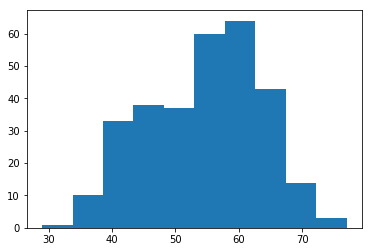

In [14]:
#histogram
fig, ax = plt.subplots()
ax.hist(health_data["AGE"].values)
plt.show()

Choose 2 or 3 floating point variables. Build classification model. Add more columns. Isolate which columns are the best predictors of NUM. Naives Bayes. Classification Tree/Random Forest. Baseline model. 70/30 train/test split. Scikit-learn. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#examples-using-sklearn-naive-bayes-gaussiannb, clf = GaussianNB(), fit, score, X_train, Y_train, X_test, Y_test, clf.fit(X_train, Y_train), clf.predict(X_test), %time / %timeit, Excel file of time(fit, ), time(score), accuracy, F-score

In [15]:
#### Modeling
## Baseline Binary Classifier Model - Navies Bayes Model
# Predictor Vars = AGE, GENDER, CP, TRESTBPS - A doctor can collect these variables during an office vist

# Feature Engineering
# Create HD, binary version of NUM. Bin AGE and TRESTBPS into five bins. Create binary versions of variables
HD = (health_data.loc[: ,"NUM"] >= 1).astype(np.int_) #0 = no heart disease; 1 = heart disease
health_data = health_data.assign(HD = HD)

age_bins = health_data.loc[:,"AGE"].quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
age_bins.iloc[3] = 57.9 # Results in a more even distribution of observations into the bins
AGEBIN = pd.cut(health_data.loc[:,"AGE"], age_bins, labels = [1,2,3,4,5], include_lowest = True)
health_data = health_data.assign(AGEBIN = np.int_(AGEBIN))

trestbps_bins = health_data.loc[:,"TRESTBPS"].quantile([0.0, 0.19, 0.39, 0.59, 0.79, 1.0], interpolation = "lower")
TRESTBPSBIN = pd.cut(health_data.loc[:,"TRESTBPS"], trestbps_bins, labels = [1,2,3,4,5], include_lowest = True)
health_data = health_data.assign(TRESTBPSBIN = np.int_(TRESTBPSBIN))

health_data_bin = pd.get_dummies(health_data, columns = ["GENDER", "AGEBIN", "TRESTBPSBIN", "CP"])

health_data.head()

,AGE,GENDER,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM,HD,AGEBIN,TRESTBPSBIN
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0,0,5,5
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2,1,5,5
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1,1,5,2
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0,0,1,3
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0,0,1,3


In [35]:
# 70/30 train/test split
# Stratified random sample by heart disease class, equal proportion
health_data_0 = health_data_bin.loc[health_data.loc[:,"HD"] == 0,:] #patients without heart disease
health_data_1 = health_data_bin.loc[health_data.loc[:,"HD"] == 1,:] #patients with heart disease
r_seed = 7
train_data = health_data_0.sample(frac = 0.7, random_state = r_seed)
train_data = train_data.append(health_data_1.sample(frac = 0.7, random_state = r_seed))
test_index = health_data_bin.index.difference(train_data.index)
test_data = health_data_bin.iloc[test_index]

In [36]:
print(train_data.loc[:,"HD"].value_counts())
print(test_data.loc[:,"HD"].value_counts())

0    115
1     97
Name: HD, dtype: int64
0    49
1    42
Name: HD, dtype: int64


In [108]:
# Model
import sklearn.naive_bayes as nb
X = train_data.filter(regex = r"GENDER|CP|AGEBIN|TRESTBPSBIN")
Y = train_data.loc[:,"HD"]
clf_nb = nb.BernoulliNB()
clf_nb.fit(X, Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [136]:
#X = test_data.filter(regex = r"GENDER|CP|AGEBIN|TRESTBPSBIN")
#Y = test_data.loc[:,"HD"]

#Record probability that HD = 1 for each training observation and classifier 
train_classes_out = pd.DataFrame(columns = ["THRESHOLD","ID","ACTUAL",
                                            "NBPROB","NBCLASS",
                                            "LOGITPROB","LOGITCLASS",
                                            "TREEPROB","TREECLASS",
                                            "FORESTPROB","FORESTCLASS"])
thresholds = np.arange(101)/100
train_classes_out.loc[:,"THRESHOLD"] = np.repeat(thresholds, train_data.shape[0])
train_classes_out.loc[:,"ID"] = np.tile(train_data.index.values, thresholds.shape[0])
train_classes_out.loc[:,"ACTUAL"] = np.tile(Y.values, thresholds.shape[0])

#Naive Bayes
train_classes_out.loc[:,"NBPROB"] = np.tile(clf_nb.predict_proba(X)[:,1], thresholds.shape[0])
train_classes_out.loc[:,"NBCLASS"] = (train_classes_out.loc[:, "NBPROB"] >= train_classes_out.loc[:, "THRESHOLD"]).astype(np.int_)

In [141]:
train_classes_out.iloc[7689:7760,:]

,THRESHOLD,ID,ACTUAL,NBPROB,NBCLASS,LOGITPROB,LOGITCLASS,TREEPROB,TREECLASS,FORESTPROB,FORESTCLASS
7689,0.36,27,0,0.118394,0,NaN,NaN,NaN,NaN,NaN,NaN
7690,0.36,219,0,0.960716,1,NaN,NaN,NaN,NaN,NaN,NaN
7691,0.36,200,0,0.283368,0,NaN,NaN,NaN,NaN,NaN,NaN
7692,0.36,256,0,0.437083,1,NaN,NaN,NaN,NaN,NaN,NaN
7693,0.36,169,0,0.005651,0,NaN,NaN,NaN,NaN,NaN,NaN
7694,0.36,258,0,0.244753,0,NaN,NaN,NaN,NaN,NaN,NaN
7695,0.36,149,0,0.044822,0,NaN,NaN,NaN,NaN,NaN,NaN
7696,0.36,249,0,0.322654,0,NaN,NaN,NaN,NaN,NaN,NaN
7697,0.36,134,0,0.015366,0,NaN,NaN,NaN,NaN,NaN,NaN
7698,0.36,14,0,0.160816,0,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
#### Output statistics and graphs
#Save number of true positives, false negatives, false positives and true negatives
#Accuracy, Precision, Recall, F-score, true positive rate, false positive rate, mutual information
#Create ROC curve

from sklearn import metrics

#Naive Bayes
model = "NBCLASS"
nb_stats = pd.DataFrame(columns = ["THRESHOLD","ACCURACY","PRECISION","RECALL","FSCORE","TPRATE","FPRATE","MI"], dtype = np.float_)
for threshold in thresholds:
    rows = (train_classes_out.loc[:,"THRESHOLD"] == threshold)
    act = train_classes_out.loc[rows,"ACTUAL"]
    pred = train_classes_out.loc[rows,model]
    tot = act.shape[0]
    tp = sum((act == 1) & (pred == 1))
    fp = sum((act == 0) & (pred == 1))
    fn = sum((act == 1) & (pred == 0))
    tn = sum((act == 0) & (pred == 0))
    acc = (tp + tn)/tot
    if tp + fp == 0:
        pre = np.nan
    else:
        pre = tp/(tp + fp)
    
    tpr = rec = tp/(tp + fn)
    fsc = (2 * pre * rec)/(pre + rec)
    fpr = fp/(fp + tn)
    mi = metrics.mutual_info_score(act, pred)
    
    nb_stats = nb_stats.append({"THRESHOLD": threshold,
                     "ACCURACY": acc,
                     "PRECISION": pre,
                     "RECALL": rec,
                     "FSCORE": fsc,
                     "TPRATE": tpr,
                     "FPRATE": fpr,
                     "MI": mi}, ignore_index = True)  

In [250]:
nb_stats.iloc[50,:]

THRESHOLD    0.500000
ACCURACY     0.787736
PRECISION    0.760000
RECALL       0.783505
FSCORE       0.771574
TPRATE       0.783505
FPRATE       0.208696
MI           0.174648
Name: 50, dtype: float64

(212,)

In [187]:
p00 = 85/212; p01 = 21/212; p10 = 30/212; p11 = 76/212;
p_0 = 115/212; p_1 = 97/212; p0_ = 106/212; p1_ = 106/212;
p00 * np.log(p00/(p_0 * p0_)) + p01 * np.log(p01/(p0_ * p_1)) + p10 * np.log(p10/(p_0 * p1_)) + p11 * np.log(p11/(p_1 * p1_))

0.14275955616792968

In [174]:
pd.crosstab(pred,act, margins = True)

ACTUAL,0,1,All
NBCLASS,,,
0,85,21,106
1,30,76,106
All,115,97,212


In [ ]:
#Plot histograms of AGE and TRESTBPS
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

In [ ]:
ax1.hist(X_cont.AGE.values)
ax2.hist(X_cont.TRESTBPS.values, bins = 10)
plt.show()

In [ ]:
import sklearn.naive_bayes as nb
clf_cont = nb.GaussianNB()
clf_disc = nb.MultinomialNB()
clf_cont.fit(X_cont, Y)
clf_disc.fit(X_disc, Y)

In [ ]:
#Class probabilities and predictions
clf_disc.predict(X_disc)

In [ ]:
clf_disc.get_params()

In [ ]:
np.exp(clf.class_log_prior_)

In [ ]:
X = np.int_([[0,1],[1,0],[0,1],[0,0],[1,0],[1,1],[0,1],[0,1]])
Y = np.array([0, 0, 1, 1, 1, 1,1,1])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
print(clf.predict([[1, 1]]))
print(np.exp(clf.class_log_prior_))
print(clf.class_count_)
print(clf.feature_count_)
print(clf.alpha)
print(np.exp(clf.feature_log_prob_))

In [ ]:
train_data.iloc[0:4,]

In [ ]:
a = pd.get_dummies(train_data.iloc[0:4,], columns = ["AGE"])
a

In [ ]:
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
>>> from sklearn.naive_bayes import MultinomialNB
>>> clf = MultinomialNB()
>>> clf.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
>>> print(clf.predict(X[2:3]))